In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd

In [3]:
img_color = imread('railway.jpg')
#image1_Gray = rgb2gray(image1)
img_gray = imread('railway.jpg', as_gray=True)

# Display histogram (color & grayscale)

In [2]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image)
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

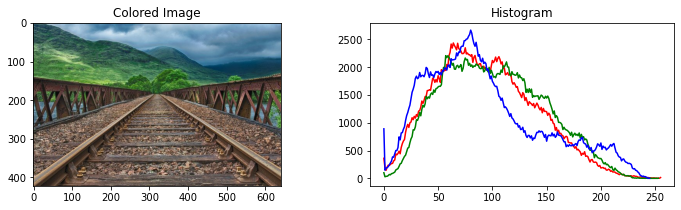

In [4]:
imageHist(img_color)

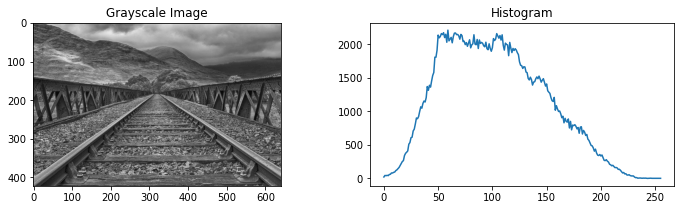

In [5]:
imageHist(img_gray)

# Display images stats

In [27]:
def RGBStats(image): 
    if (image.ndim == 2):
        gray = []
        max_gray =np.max(image) 
        min_gray =np.min(image) 
        mean_gray = np.mean(image) 
        median_gray = np.median(image) 
        row = (min_gray, max_gray, mean_gray, median_gray)
        gray.append(row)
        return pd.DataFrame(gray,  
                            index = ['Gray'], 
                            columns = ['Min', 'Max', 'Mean', 'Median'])
    else:
        colors = [] 
        for i in range(0, 3): 
            max_color =np.max(image[:,:,i]) 
            min_color =np.min(image[:,:,i]) 
            mean_color = np.mean(image[:,:,i]) 
            median_color = np.median(image[:,:,i]) 
            row = (min_color, max_color, mean_color, median_color)
            colors.append(row)
        return pd.DataFrame(colors,  
                            index = ['Red', ' Green', 'Blue'], 
                            columns = ['Min', 'Max', 'Mean', 'Median'])


In [28]:
RGBStats(img_color)

,Min,Max,Mean,Median
Red,0,255,94.033416,90.0
Green,0,253,101.689259,98.0
Blue,0,245,93.127629,83.0


In [29]:
RGBStats(img_gray)

,Min,Max,Mean,Median
Gray,0.000833,0.974707,0.389981,0.377384


In [20]:
np.max(img_gray)

0.9747066666666667